## A la rencontre du Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>Il s'agit du docteur Ignaz Semmelweis, un médecin hongrois né en 1818 et exerçant à l'hôpital général de Vienne. Si le Dr Semmelweis semble troublé, c'est probablement parce qu'il pense à la <em>fièvre infantile</em>: une maladie mortelle affectant les femmes qui viennent d'accoucher. Il y réfléchit parce qu'au début des années 1840, à l'Hôpital général de Vienne, 10% des femmes qui accouchaient en mouraient. Il y réfléchit parce qu'il connaît la cause de la fièvre de l'enfance: ce sont les mains contaminées des médecins qui aident les femmes à accoucher. Ces derniers ne l'écouteront pas et <em>s'en laveront les mains</em>!</p>
<p>Dans ce notebook, nous allons réanalyser les données qui ont permis à Semmelweis de découvrir l’importance du <em>lavage des mains</em>. Commençons par examiner les données qui ont permis à Semmelweis de se rendre compte que les procédures à l’Hôpital général de Vienne avaient un problème.</p>

In [9]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## Le nombre alarmant de morts
<p>Le tableau ci-dessus montre le nombre de femmes accouchant dans les deux cliniques de l'Hôpital général de Vienne pour les années 1841 à 1846. Vous remarquerez que l'accouchement était très dangereux; un nombre <em>alarmant</em> de femmes sont décédées des suites d'un accouchement, la plupart d'entre elles à la suite d'une fièvre infantile.</p>
<p>Nous le voyons plus clairement si nous examinons la <em>proportion de décès</em> par rapport au nombre de femmes donnant naissance. Zoomons sur la proportion de décès à la clinique 1.</p>

In [10]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly["clinic"] == 'clinic 1']
yearly2 = yearly[yearly["clinic"] == 'clinic 2']

# Print out yearly1
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## Mort aux cliniques
<p>Si nous calculons maintenant la proportion de décès à la clinique 1 et à la clinique 2, nous verrons une tendance curieuse ...</p>

Text(0, 0.5, 'Proportion deaths')

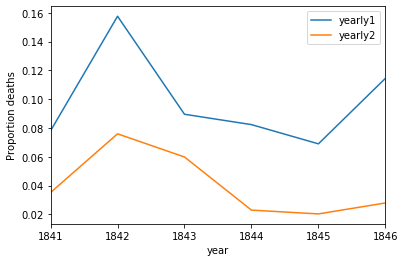

In [11]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x="year", y="proportion_deaths", label="yearly1")
yearly2.plot(x="year", y="proportion_deaths", label="yearly2", ax=ax)
ax.set_ylabel("Proportion deaths")

## Le lavage des mains commence
<p>Pourquoi la proportion de décès est-elle constamment aussi élevée dans la clinique 1? Semmelweis a vu le même modèle et était perplexe et angoissé. La seule différence entre les cliniques était que beaucoup d'étudiants en médecine avaient servi à la clinique 1, alors que la plupart étaient des sages-femmes à la clinique 2. Alors que les sages-femmes ne s'occupaient que des femmes qui donnaient naissance, les étudiants en médecine ont également passé du temps dans les salles d'autopsie pour examiner les cadavres. </p>
<p>Semmelweis a commencé à soupçonner que quelque chose sur les cadavres, répendu sur les mains des étudiants en médecine, a provoqué une fièvre infantile. Donc, dans une tentative désespérée pour arrêter le taux de mortalité élevé, il a décrété: <em>Lavez-vous les mains!</em> C’était une demande peu orthodoxe et controversée, personne à Vienne n’avait entendu parler des bactéries pour le moment. </p>
<p>Chargeons les données mensuelles de la clinique 1 pour voir si le lavage des mains a eu un effet.</p>

In [12]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## L'effet du lavage des mains
<p>Avec les données chargées, nous pouvons maintenant examiner la proportion de décès dans le temps. Dans le graphique ci-dessous, nous n'avons pas indiqué où le lavage obligatoire des mains avait commencé, mais il a réduit la proportion de décès à un point tel que vous devriez pouvoir le repérer!</p>

Text(0, 0.5, 'Proportion deaths')

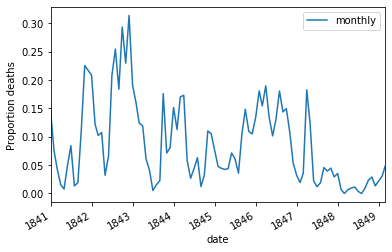

In [13]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths", label="monthly")
ax.set_ylabel("Proportion deaths")

## L'effet du lavage des mains mis en évidence
<p>À partir de l'été 1847, la proportion de décès est considérablement réduite et c'est effectivement à ce moment-là que Semmelweis a rendu obligatoire le lavage des mains. </p>
<p>L'effet du lavage des mains est encore plus clair si nous le soulignons dans le graphique.</p>

Text(0, 0.5, 'Proportion deaths')

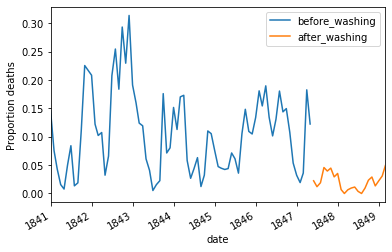

In [14]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="before_washing")
after_washing.plot(x="date", y="proportion_deaths", label="after_washing", ax=ax)
ax.set_ylabel("Proportion deaths")

## Plus de lavage des mains, moins de décès?
<p>Encore une fois, le graphique montre que le lavage des mains a eu un effet considérable. Combien a-t-il réduit la proportion mensuelle de décès en moyenne?</p>

In [15]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

## Une analyse Bootstrap des données de lavage des mains de Semmelweis
<p>Cela a réduit la proportion de décès d'environ 8 points de pourcentage! De 10% en moyenne à seulement 2% (chiffre qui reste élevé par rapport aux normes modernes). </p>
<p>Pour avoir une idée de l’incertitude entourant la réduction du nombre de décès dus au lavage des mains, nous pourrions examiner un intervalle de confiance (calculé ici à l’aide de la méthode du bootstrap).</p>

In [16]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101966
0.975   -0.066418
dtype: float64

## Le destin de Dr. Semmelweis
<p>Le lavage des mains réduit donc la proportion de décès de 6,7 à 10 points de pourcentage, selon un intervalle de confiance de 95%. Dans l’ensemble, il semblerait que Semmelweis disposait de preuves solides que le lavage des mains était une procédure simple mais très efficace pouvant sauver de nombreuses vies.</p>
<p>La tragédie est que, malgré les preuves, la théorie de Semmelweis - selon laquelle la fièvre infantile était causée par une "substance" (ce que nous appelons aujourd'hui les <em>bactéries</em>) de cadavres dans une salle d'autopsie — a été ridiculisé par les scientifiques contemporains. La communauté médicale a en grande partie rejeté sa découverte et, en 1849, il a été contraint de quitter définitivement l'Hôpital général de Vienne.</p>
<p>Une des raisons à cela est que la statistique et les arguments statistiques étaient rares en science médicale au XIXe siècle. Semmelweis n'a publié ses données que sous forme de longs tableaux de données brutes, mais n'a montré aucun graphique ni intervalle de confiance. S'il avait eu accès à l'analyse que nous venons de préparer, il aurait peut-être mieux réussi à faire laver les mains des médecins viennois.</p>

In [17]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True